# Introduction to Thermodynamics and Statistical Physics

In this lecture, we are going to discuss entropy. In particular, we'll cover:

* Entropy of mixing.
* Entropy and probability.
* Alternative Thermodynamics Potentials.


## Entropy of mixing

Let us know consider 2 different ideal gases. They are initially in separate vessels with volume $x V$ an $(1-x) V$ respectively, where $0<x<1$. Both gases are at the same pressure, $P$, and temperature, $T$.

![Entropy_of_mixing](Figures/Entropy_of_mixing.png)

We can write the pressure of either gas to be
$$
    P = \frac{N_{1,2}k_{\rm B}T}{V_{1,2}}
$$
Since the pressure in both gases is the same, this gives
$$
    \frac{N_1k_{\rm B}T}{xV} = \frac{N_2k_{\rm B}T}{(1-x)V}
$$
If we then define $N=N_1+N_2$ as the total number of particles, then we get that $N_1 = xN$ and $N_2 = (1-x)N$.

If we now open the tap, then the gases will mix. As we considered for the Joule expansion, we can calculate the entropy by imagining that the mixing occurs reversibly. Let's imagine an isothermal expansion, which means that the internal energies of the gases do not change. This means that
$$
    T {\rm d}S = P{\rm d} V \rightarrow {\rm d}S = \frac{P{\rm d} V}{T} \rightarrow {\rm d}S =  \frac{N k_{\rm B}}{V} {\rm d} V
$$
Now, to find the total change in entropy, we consider the change in entropy due to gas 1 expanding isothermally to fill the full container, and gas 2 expanding isothermally to fill the full container
\begin{align}
    \Delta S &= \int_{xV}^{V} \frac{N_1 k_{\rm B}}{V_1} {\rm d} V_1 + \int_{(1-x)V}^{V} \frac{N_2 k_{\rm B}}{V_2} {\rm d} V_2 \\
             &= \int_{xV}^{V} \frac{xN k_{\rm B}}{V_1} {\rm d} V_1 + \int_{(1-x)V}^{V} \frac{(1-x)N k_{\rm B}}{V_2} {\rm d} V_2 \\
             &= xN k_{\rm B} \int_{xV}^{V} \frac{1}{V_1} {\rm d} V_1 + (1-x)N k_{\rm B}\int_{(1-x)V}^{V} \frac{1}{V_2} {\rm d} V_2 \\
             &= xN k_{\rm B} (\ln (V) - \ln (xV)) + (1-x)N k_{\rm B}(\ln (V) - \ln ((1-x)V)) \\
             &= -N k_{\rm B}[x\ln (x) + (1-x)\ln(1-x)]
\end{align}
So how does this look?

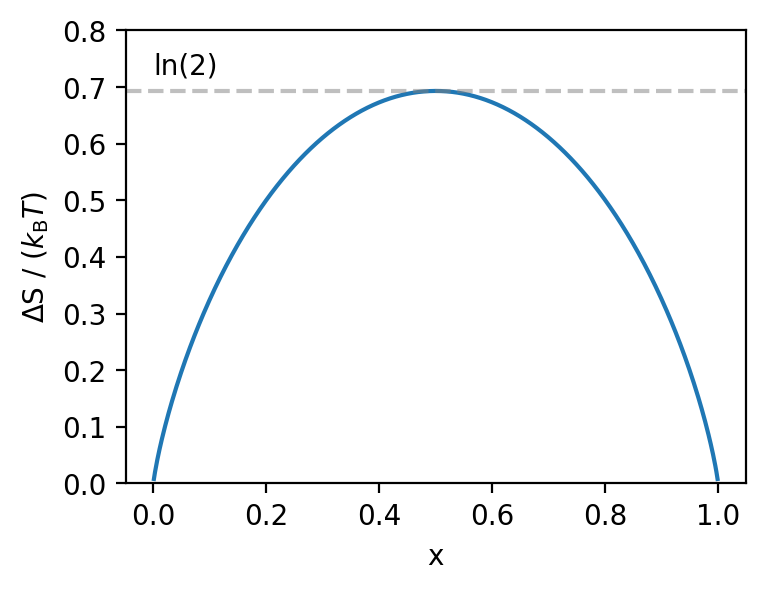

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.001,1.001,0.002)
S = -(x*np.log(x)+(1-x)*np.log(1-x))

plt.figure(figsize=[4,3],dpi=200)
plt.plot(x,S)
plt.axhline(np.log(2),linestyle='--',color='grey',alpha=0.5)
plt.text(0,np.log(2)+0.03,"ln(2)")
plt.ylim(0.,0.8)
plt.xlabel("x")
plt.ylabel(r"$\Delta$S / ($k_{\rm B} T)$")
plt.savefig("Figures/Entropy_Mixing_Plot.png")
plt.show()

From this, it is clear that the maximum change in entropy occurs when $x=0.5$. We can also arrive at this same result by considering the microstates for the gases. Before mixing, we know that gas 1 is only in the first vessel, while gas 2 is only in the second vessel. After mixing, the number of microstates available to each particle increases by 2 - they can either be in the first vessel, or the second vessel. As such, the statistical weight, $\Omega$, must be multipled by $2^N$ to account for these new microstates. This means that 
$$
    \Delta S = k_{\rm B} \ln 2^N = N k_{\rm B} \ln 2
$$


## Combining Entropy & Probability

Consider again $S=k_{\rm B} \ln \Omega$. How does the entropy account for microstates? Let's do an example to check.

Imagine we have a system which has 5 macrostates (that is, these states are easily distinguishable by measuring some macrovariable such as energy), each of which is equally likely to occur. This means that
$$
    S=k_{\rm B} \ln 5
$$
Now assume that each macrostate has 3 microstates (states which we cannot distinguish, so associated perhaps with particle positions or momenta) associated with it, which are also equally likely to occur. This means that there is an additional entropy associated with each of these microstates, $S_{\rm micro} = k_{\rm B} \ln 3$.

There are a total of 15 unique states the system can be in (5 macro, 3 micro for each macro). The total entropy of the system is thus given by 
$$
    S_{\rm total}=k_{\rm B} \ln 15
$$
which can be decomposed into
$$
    S_{\rm total}=k_{\rm B} \ln 5+k_{\rm B} \ln 3
$$
This means that we can write
$$
    S_{\rm total} = S+S_{\rm micro}
$$
The reasons for doing this will become clear in a second.

Now, consider a system which has a total of N equally-likely microstates. These microstates are subdivided into groups corresponding to macrostates, such that a macrostate $i$ has a total of $n_i$ microstates associated with it. We require that
$$
    \sum _i n_i = N
$$
(That is, summing together the number of microstates in each macrostate is the same as the total number of microstates available). The probability that the system is in the $i$th macrostate is then given by
$$
    P_i = \frac{n_i}{N}.
$$
The total entropy of this system is
$$
    S_{\rm total} = k_{\rm B} \ln N
$$
The problem we are faced with is that, quite often, $N$ is difficult to measure. For examples like dipoles oriented in magnetic fields, we have a rough idea (it's of order $2^M$ for M particles), but this is only for a very specific example. In general, we have
$$
    S_{\rm total} = S+S_{\rm micro}
$$
where $S$ is the entropy due to the number of macrostates while $S_{\rm micro}$ is an unknown entropy contribution to the number of available microstates. This is given by
$$
    S_{\rm micro} = <S_i> = \sum_i P_i S_i
$$
Given this, we can do the following
\begin{align}
    S &= S_{\rm total} - S_{\rm micro}\\
      &= k_{\rm B} (\ln N - \sum_i P_i \ln n_i)\\
      &= k_{\rm B} \sum_i P_i( \ln N - \ln n_i)\\
\end{align}
Now, $\ln (N) - \ln (n_i) = \ln(N/n_i) = \ln(1/P_i)= -\ln(P_i)$. This gives us Gibbs' definition of Entropy
$$
    S = - k_{\rm B} \sum_i P_i \ln(P_i)
$$

## Thermodynamic Potentials

Up until this point, we have been working a lot with the internal energy if a system, $U$, which is a function of state. In principle, we can combine $U$ with any other functions of state ($P$, $V$, $S$, $T$) to create new functions of state. This are called **thermodynamic potentiels**. In this next section, we are going to look at some thermodynamic potentials which can be very useful in certain situations.

### Internal energy, $U$

We've spent a lot of time dealing with $U$, so I'm not going to dwell on it too much. Below is simply a summary of where we've encountered $U$ previously.
First,
$$
    {\rm d}U = T{\rm d}S - P{\rm d} V
$$
which is the fundamental thermodynamic potential. From this, we can state that, $U=U(S,V)$. Now we will define an isochoric process as one during which the volume stays constant (${\rm d} V = 0$). In this case, we have
$$
    {\rm d}U = T{\rm d}S
$$
If we have a reversible isochoric process, then we also have that
$$
    {\rm d}U = {\rm d}Q = C_V {\rm d} T
$$
Thus
$$
    \Delta U = \int_{T_1} ^{T_2} C_V {\rm d} T
$$
The fundamental thermodynamic relation also gives us that 
$$
   T = \left(\frac{\partial U}{\partial S}\right)_V ; P = -\left(\frac{\partial U}{\partial V}\right)_S
$$

This is only true at constant volume. To handle a process at constant pressure, we need a different potential.


### Enthalpy, H

Imagine we are studying a small thermodynamic system inside a large room. Keeping track of the total internal energy of the system as it does work (or has work done on it) can be a bit of a pain. Instead, we can always add the work that is needed to make space for the system ($PV$ when under constant pressure). This gives us enthalpy:
$$
    H = U+PV.
$$
Thus, an infinitesimal change in $H$ is given by
\begin{align}
    {\rm d} H &= T{\rm d} S - P {\rm d} V + P {\rm d} V + V {\rm d} P\\
    {\rm d} H &= T{\rm d} S + V {\rm d} P
\end{align}
From this, we can say that $H=H(S,P)$. For an isobaric process (${\rm d}P=0$), we then have
$$
    {\rm d} H = T{\rm d} S
$$
and for a reversible process we have
$$
    {\rm d}H = {\rm d}Q = C_P {\rm d} T
$$
Thus
$$
    \Delta H = \int_{T_1} ^{T_2} C_P {\rm d} T
$$
Thus, for a process performed at contant pressure, then the enthalpy represents the heat transferred to or from the system.
Our definition of the enthalpy also gives us that
$$
   T = \left(\frac{\partial H}{\partial S}\right)_P ; V = \left(\frac{\partial H}{\partial P}\right)_S
$$

### Helmholtz Free Energy (or Helmholtz Function)

The above potentials are both functions of entropy, $S$, which can difficult to vary experimentally. This next thermodynamic potential does not suffer the same drawback. Let's define the Helmholtz Free Energy as
$$
    F = U - TS.
$$
This gives
\begin{align}
    {\rm d} F &= T {\rm d} S - P {\rm d} V - T {\rm d} S - S {\rm d} T\\
              &= - S {\rm d} T - P {\rm d} V
\end{align}
From this, we can say that $F=F(T,V)$. For an isothermal process, we thus have
$$
    {\rm d} F = - P {\rm d} V
$$
giving
$$
    \Delta F = - \int_{V_1}^{V_2} P {\rm d} V
$$
Our definition of the Helmholtz Free Energy also gives us that
$$
   S = -\left(\frac{\partial F}{\partial T}\right)_V ; P = -\left(\frac{\partial F}{\partial V}\right)_T
$$

### Gibbs Free Energy (or Gibbs Function)

Let
$$
    G = H - TS
$$
This gives
\begin{align}
    {\rm d} G &= T {\rm d} S + V {\rm d} P - T {\rm d} S - S {\rm d} T\\
              &= - S {\rm d} T + V {\rm d} P
\end{align}
Thus $G=G(T,P)$, which is particularly useful as both $T$ and $P$ are easy to control and change in experiments. Thus, if you have an isothermal isobaric process, then ${\rm d} G = 0$. This will be useful when we are studying phase transitions later.
Our definition of the Gibbs Free Energy also gives us that
$$
   S = -\left(\frac{\partial G}{\partial T}\right)_P ; V = \left(\frac{\partial G}{\partial P}\right)_T
$$

## Availability

So what use are these new thermodynamic potentials? As a starting point, consider the setup below where we have a system inside some surroundings. The system will be allowed to exchange heat and to do work on the surroundings.

![Entropy_of_mixing](Figures/Surroundings.png)

So what happens when energy ${\rm d} U$ and volume ${\rm d} V$ are transferred from the surroundings to the system? First, the internal energy of the surroundings will change according to the 1st law by
$$
    {\rm d} U_0 = - {\rm d} U = T_0 {\rm d} S_0 - P_0 (- {\rm d} V)
$$
The $-$ in ${\rm d} U$ and in ${\rm d} V$ are because these quantites are being transferred **to** the system, and as such are negative for the surroundings. Rearranging we have
$$
    {\rm d} S_0 = - \left(\frac{{\rm d} U + P_0  {\rm d} V}{T_0}\right)
$$
If the entropy of the system changes by ${\rm d} S$ during this process, then the total change in entropy is
$$
    {\rm d} S_{\rm Total} = {\rm d} S_0 + {\rm d} S.
$$
The second law tells us that ${\rm d} S_{\rm Total} \geq 0$. Combining this with the above equation then gives
$$
    T_0 {\rm d} S_{\rm Total} = -({\rm d} U + P_0 {\rm d} V - T_0 {\rm d} S) \geq 0
$$
giving
$$
    {\rm d} U + P_0 {\rm d} V - T_0 {\rm d} S \leq 0.
$$
We will now define a new variable called **availability** and let it be
$$
    A  = U + P_0 V - T_0 S
$$
such that (given that $P_0$ and $T_0$ are constants)
$$
    {\rm d} A  = {\rm d} U + P_0 {\rm d}V - T_0 {\rm d}S.
$$
This means that
$$
    {\rm d} A \leq 0
$$
What does this actually mean? It tells us that any changes in a system as it settles down to equilibrium will decrease $A$. When at equilibrium, $A$ remains constant. As such, in order to figure out what the equilibrium conditions for a system are, all we have to do is minimise $A$. However, the type of equilibrium we are trying to achieve will affect how $A$ is minimised. What exactly does this mean? Consider the following examples, which will also tie together our thermodynamic potentials.

## Fixed entropy & volume

This means that ${\rm d} S=0$ and ${\rm d} V=0$. Thus, we have that
$$
    {\rm d} A  = {\rm d} U
$$
and
$$
    {\rm d} A = {\rm d} U \leq 0.
$$
As such, we must minimise the internal energy $U$ to find the equilibrium state of this system.

## Fixed entropy & pressure

This means that ${\rm d} S=0$ and ${\rm d} P=0$. Thus, we have that
$$
    {\rm d} A  = {\rm d} U + P_0 {\rm d}V 
$$
Recalling now that the enthalpy $H = U+PV$, such that 
$$
    {\rm d} H = {\rm d} U + P {\rm d} V + V {\rm d} P
$$
which, for constant pressure, becomes
$$
    {\rm d} H = {\rm d} U + P {\rm d} V
$$
As such, the change in availability is given by 
$$
    {\rm d} A  = {\rm d} H \leq 0.
$$
As such, we must minimise the enthalpy $H$ to find the equilibrium state of this system.

## Thermally isolated & fixed volume

If a system is thermally isolated, then ${\rm d} U = 0$. Thus 
$$
    {\rm d} A  = - T_0 {\rm d} S \leq 0
$$
which gives 
$$
    {\rm d} S  \geq 0
$$
As such, we must maximise the entropy to the find equilibrium state of this system.

## Fixed temperature & volume

This means that ${\rm d} T=0$ and ${\rm d} V=0$. Thus, we have that
$$
    {\rm d} A  = {\rm d} U - T_0 {\rm d}S
$$
Recalling that the Helmholtz Free Energy is $F = U - TS$, and following the same steps as for the fixed entropy and pressure scenario, we are left with
$$
    {\rm d} A = {\rm d} F \leq 0.
$$
So we must minimise the Helmholtz Free energy to find the equilibrium state.

## Fixed pressure and temperature

This means that ${\rm d} T=0$ and ${\rm d} P=0$. Thus, we have that
$$
    {\rm d} A  = {\rm d} U + P_0 {\rm d}V - T_0 {\rm d}S \leq 0
$$
Recalling that the Gibbs Free Energy is $G = H - TS = U + PV - TS$, we get that
\begin{align}
    {\rm d} G &= {\rm d}U + P_0 {\rm d}V + V{\rm d}P_0 - T_0{\rm d}S - S{\rm d}T_0\\
              &= {\rm d}U + P_0 {\rm d}V - T_0{\rm d}S
\end{align}
for constant $T_0$ and $P_0$. We then get
$$
    {\rm d} A = {\rm d} G \leq 0
$$
So we must minimise the Gibbs Free energy to find the equilibrium state.

So now we can see where these thermodynamic potentials come in use. Let's consider an example next.

# Maxwell's Relations

Now we are going to use the results of the 4 thermodynamic potentials to derive what are known as Maxwell's relations. First, we need to do a bit of setup. For a general function of two variables which has an exact differential, $f(x,y)$, we have that
$$
    {\rm d}f = \left(\frac{\partial f}{\partial x}\right)_y {\rm d}x + \left(\frac{\partial f}{\partial y}\right)_x {\rm d}y
$$
as we've used many times before. Because ${\rm d}f$ is an exact differential we can say that
$$
    \left(\frac{\partial ^2 f}{\partial x \partial y}\right) = \left(\frac{\partial ^2 f}{\partial y \partial x}\right)
$$
If we then write
$$
    F_x = \left(\frac{\partial f}{\partial x}\right)_y ; \:\:\: F_y = \left(\frac{\partial f}{\partial y}\right)_x
$$
we have
$$
    \frac{\partial F_y}{\partial x} = \frac{\partial F_x}{\partial y}.
$$
We can now use these relations on $U$, $H$, $F$, and $G$.

## Example using the Gibbs Free Energy

The Gibbs Free Energy is $G = H - TS$. As we saw earlier, this gives us that
$$
    {\rm d} G= - S {\rm d} T + V {\rm d} P.
$$
We can also write ${\rm d} G$ as
$$
    {\rm d} G= \left(\frac{\partial G}{\partial T}\right)_P {\rm d}T + \left(\frac{\partial G}{\partial P}\right)_T {\rm d}P
$$
which gives
$$
   S = -\left(\frac{\partial G}{\partial T}\right)_P; \:\:\: V = \left(\frac{\partial G}{\partial P}\right)_T
$$
Let's consider the first of these statements. We can perform the following operation
$$
    -\left(\frac{\partial S}{\partial P}\right)_T = \left(\frac{\partial^2 G}{\partial P \partial T}\right)
$$
We can do the following to the second statement
$$
    \left(\frac{\partial V}{\partial T}\right)_P = \left(\frac{\partial^2 G}{\partial T \partial P}\right)
$$
Now
$$
    \left(\frac{\partial^2 G}{\partial T \partial P}\right) = \left(\frac{\partial^2 G}{\partial P \partial T}\right)
$$
because $G$ is a function of state (${\rm d}G$ is an exact differential). So, we get that
$$
    -\left(\frac{\partial S}{\partial P}\right)_T = \left(\frac{\partial V}{\partial T}\right)_P
$$
This is one of Maxwell's relations. We can do the same analysis for the other 3 thermodyanmic potentials, and we end up with the following relations
\begin{align}
    \left(\frac{\partial T}{\partial V}\right)_S &= - \left(\frac{\partial P}{\partial S}\right)_V\\
    \left(\frac{\partial T}{\partial P}\right)_S &= \left(\frac{\partial V}{\partial S}\right)_P\\
    \left(\frac{\partial S}{\partial V}\right)_T &= \left(\frac{\partial P}{\partial T}\right)_V\\
    \left(\frac{\partial S}{\partial P}\right)_T &= -\left(\frac{\partial V}{\partial T}\right)_P
\end{align}